In [59]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [60]:
df_fitness = pd.read_csv("../data/FITNESS.csv", encoding = 'euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<Axes: xlabel='GENDER'>

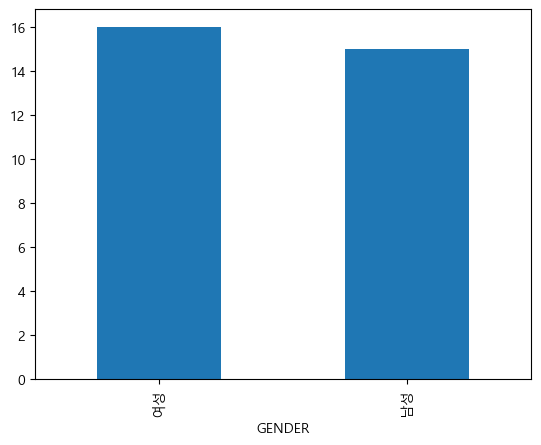

In [61]:
df_count = df_fitness['GENDER'].value_counts()
df_count.plot.bar()

<Axes: xlabel='AGEGROUP'>

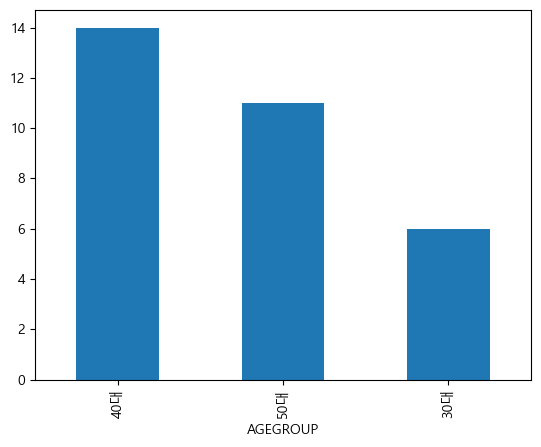

In [62]:
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.plot.bar()

<Axes: xlabel='AGEGROUP'>

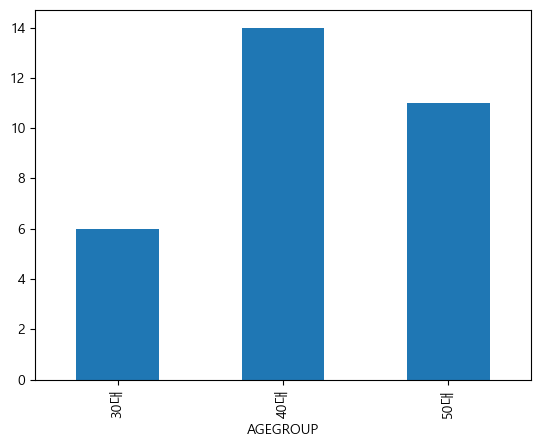

In [63]:
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.sort_index(inplace = True)
df_count.plot.bar()

<Axes: xlabel='GENDER,AGEGROUP'>

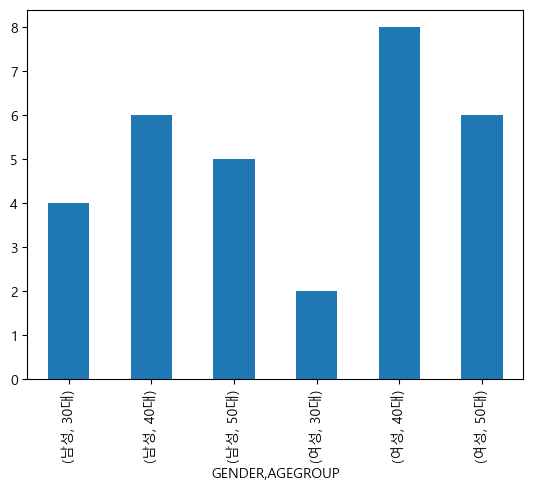

In [64]:
df_groupby_total = df_fitness.groupby(['GENDER', 'AGEGROUP']).size()
df_groupby_total.plot.bar()

<Axes: >

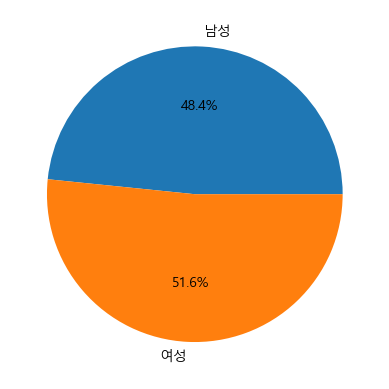

In [65]:
df_count = df_fitness.groupby(['GENDER']).size()
df_count.plot.pie(y = 'OXY', autopct = '%.1f%%')

<Axes: >

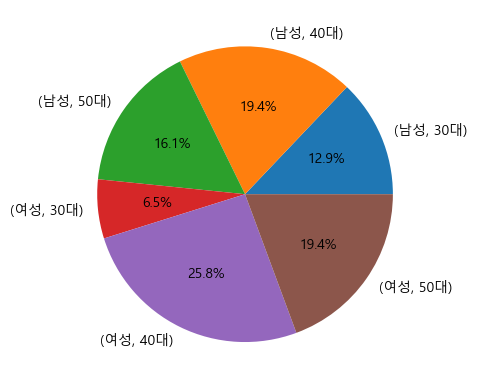

In [66]:
df_count = df_fitness.groupby(['GENDER', 'AGEGROUP']).size()
df_count.plot.pie(y = 'OXY', autopct = '%.1f%%')

In [67]:
df_currency = pd.read_csv("../data/환율.csv", parse_dates = ['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [68]:
df_currency_pivot = df_currency.pivot(index = 'APPL_DATE', columns = 'CURRENCY',
                                     values = 'STD_RATE')
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<Axes: xlabel='APPL_DATE'>

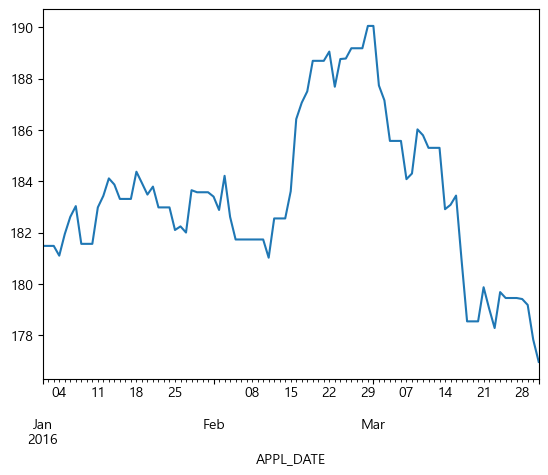

In [69]:
df_currency_pivot['CNY'].plot()

<Axes: xlabel='APPL_DATE'>

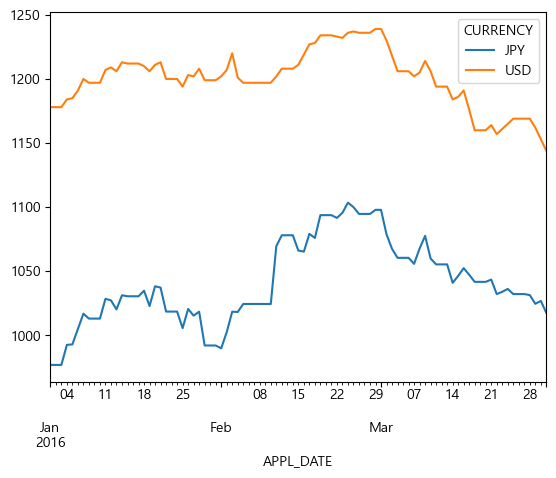

In [70]:
df_currency_pivot[['JPY', 'USD']].plot()

<Axes: >

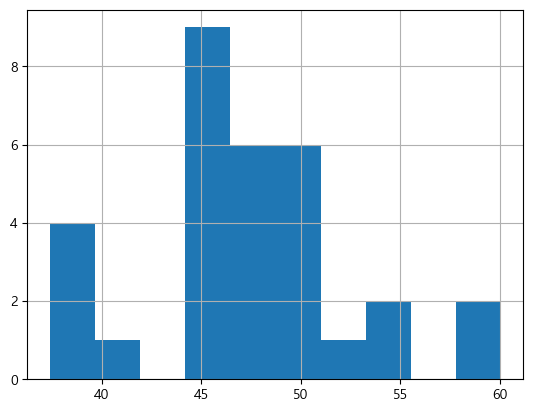

In [71]:
df_fitness['OXY'].hist()

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'WEIGHT'}>,
        <Axes: title={'center': 'OXY'}>],
       [<Axes: title={'center': 'RUNTIME'}>,
        <Axes: title={'center': 'RUNPULSE'}>,
        <Axes: title={'center': 'RSTPULSE'}>],
       [<Axes: title={'center': 'MAXPULSE'}>, <Axes: >, <Axes: >]],
      dtype=object)

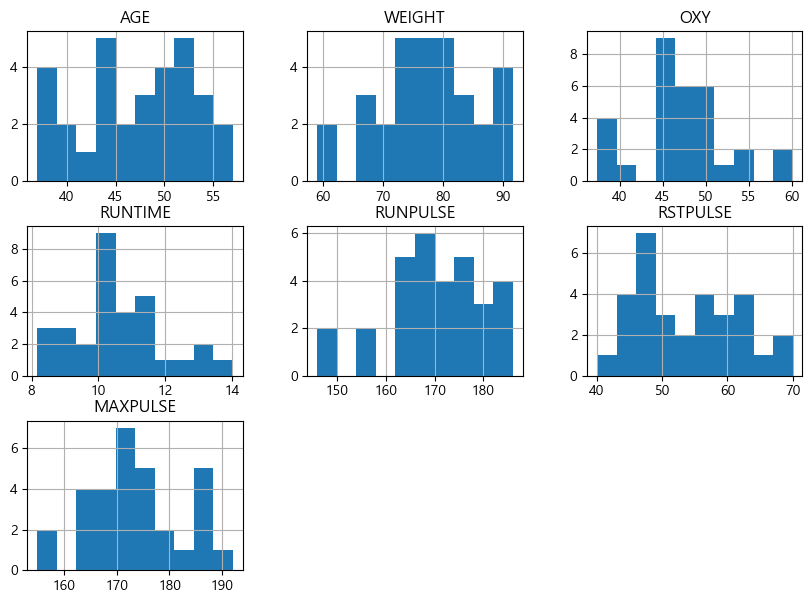

In [72]:
df_fitness.hist(figsize = (10, 7))

array([<Axes: title={'center': '남성'}>, <Axes: title={'center': '여성'}>],
      dtype=object)

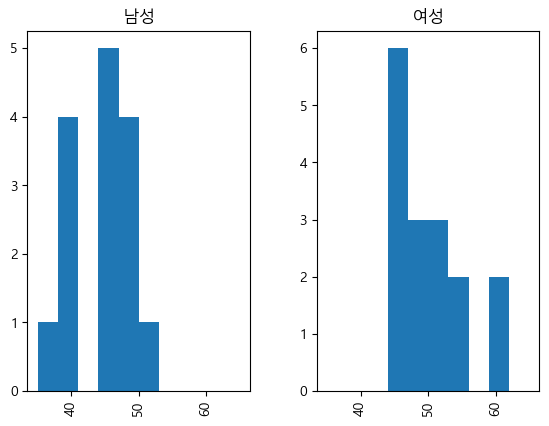

In [73]:
df_fitness.hist(column = 'OXY', by = 'GENDER', range = (35, 65))

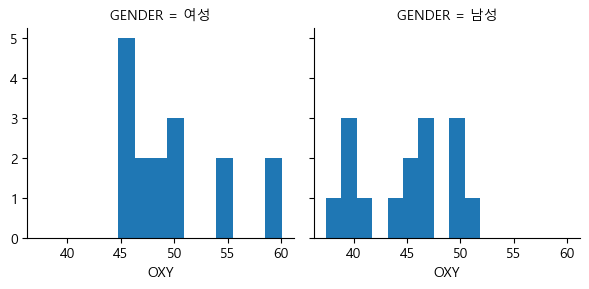

In [74]:
grid = sns.FacetGrid(df_fitness, col = 'GENDER')
grid.map(plt.hist, 'OXY')

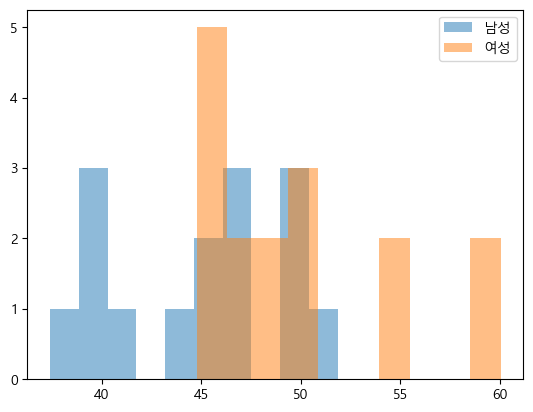

In [75]:
plt.hist(df_fitness[df_fitness['GENDER'] == '남성']['OXY'], label = '남성', alpha = 0.5)
plt.hist(df_fitness[df_fitness['GENDER'] == '여성']['OXY'], label = '여성', alpha = 0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

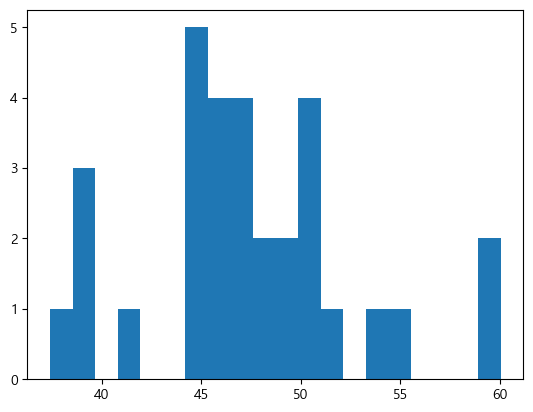

In [76]:
plt.hist(x = 'OXY', data = df_fitness, bins = 20)

<Axes: title={'center': 'OXY'}, xlabel='[GENDER, AGEGROUP]'>

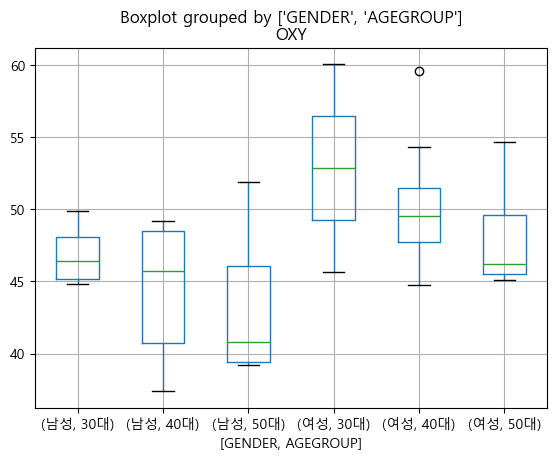

In [77]:
df_fitness.boxplot(column = 'OXY', by = ['GENDER', 'AGEGROUP'])

<Axes: xlabel='RUNTIME', ylabel='OXY'>

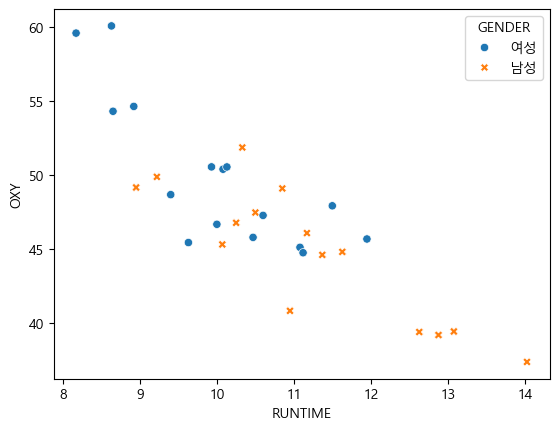

In [78]:
sns.scatterplot(x = 'RUNTIME', y = 'OXY', hue = 'GENDER', style = 'GENDER', data = df_fitness)

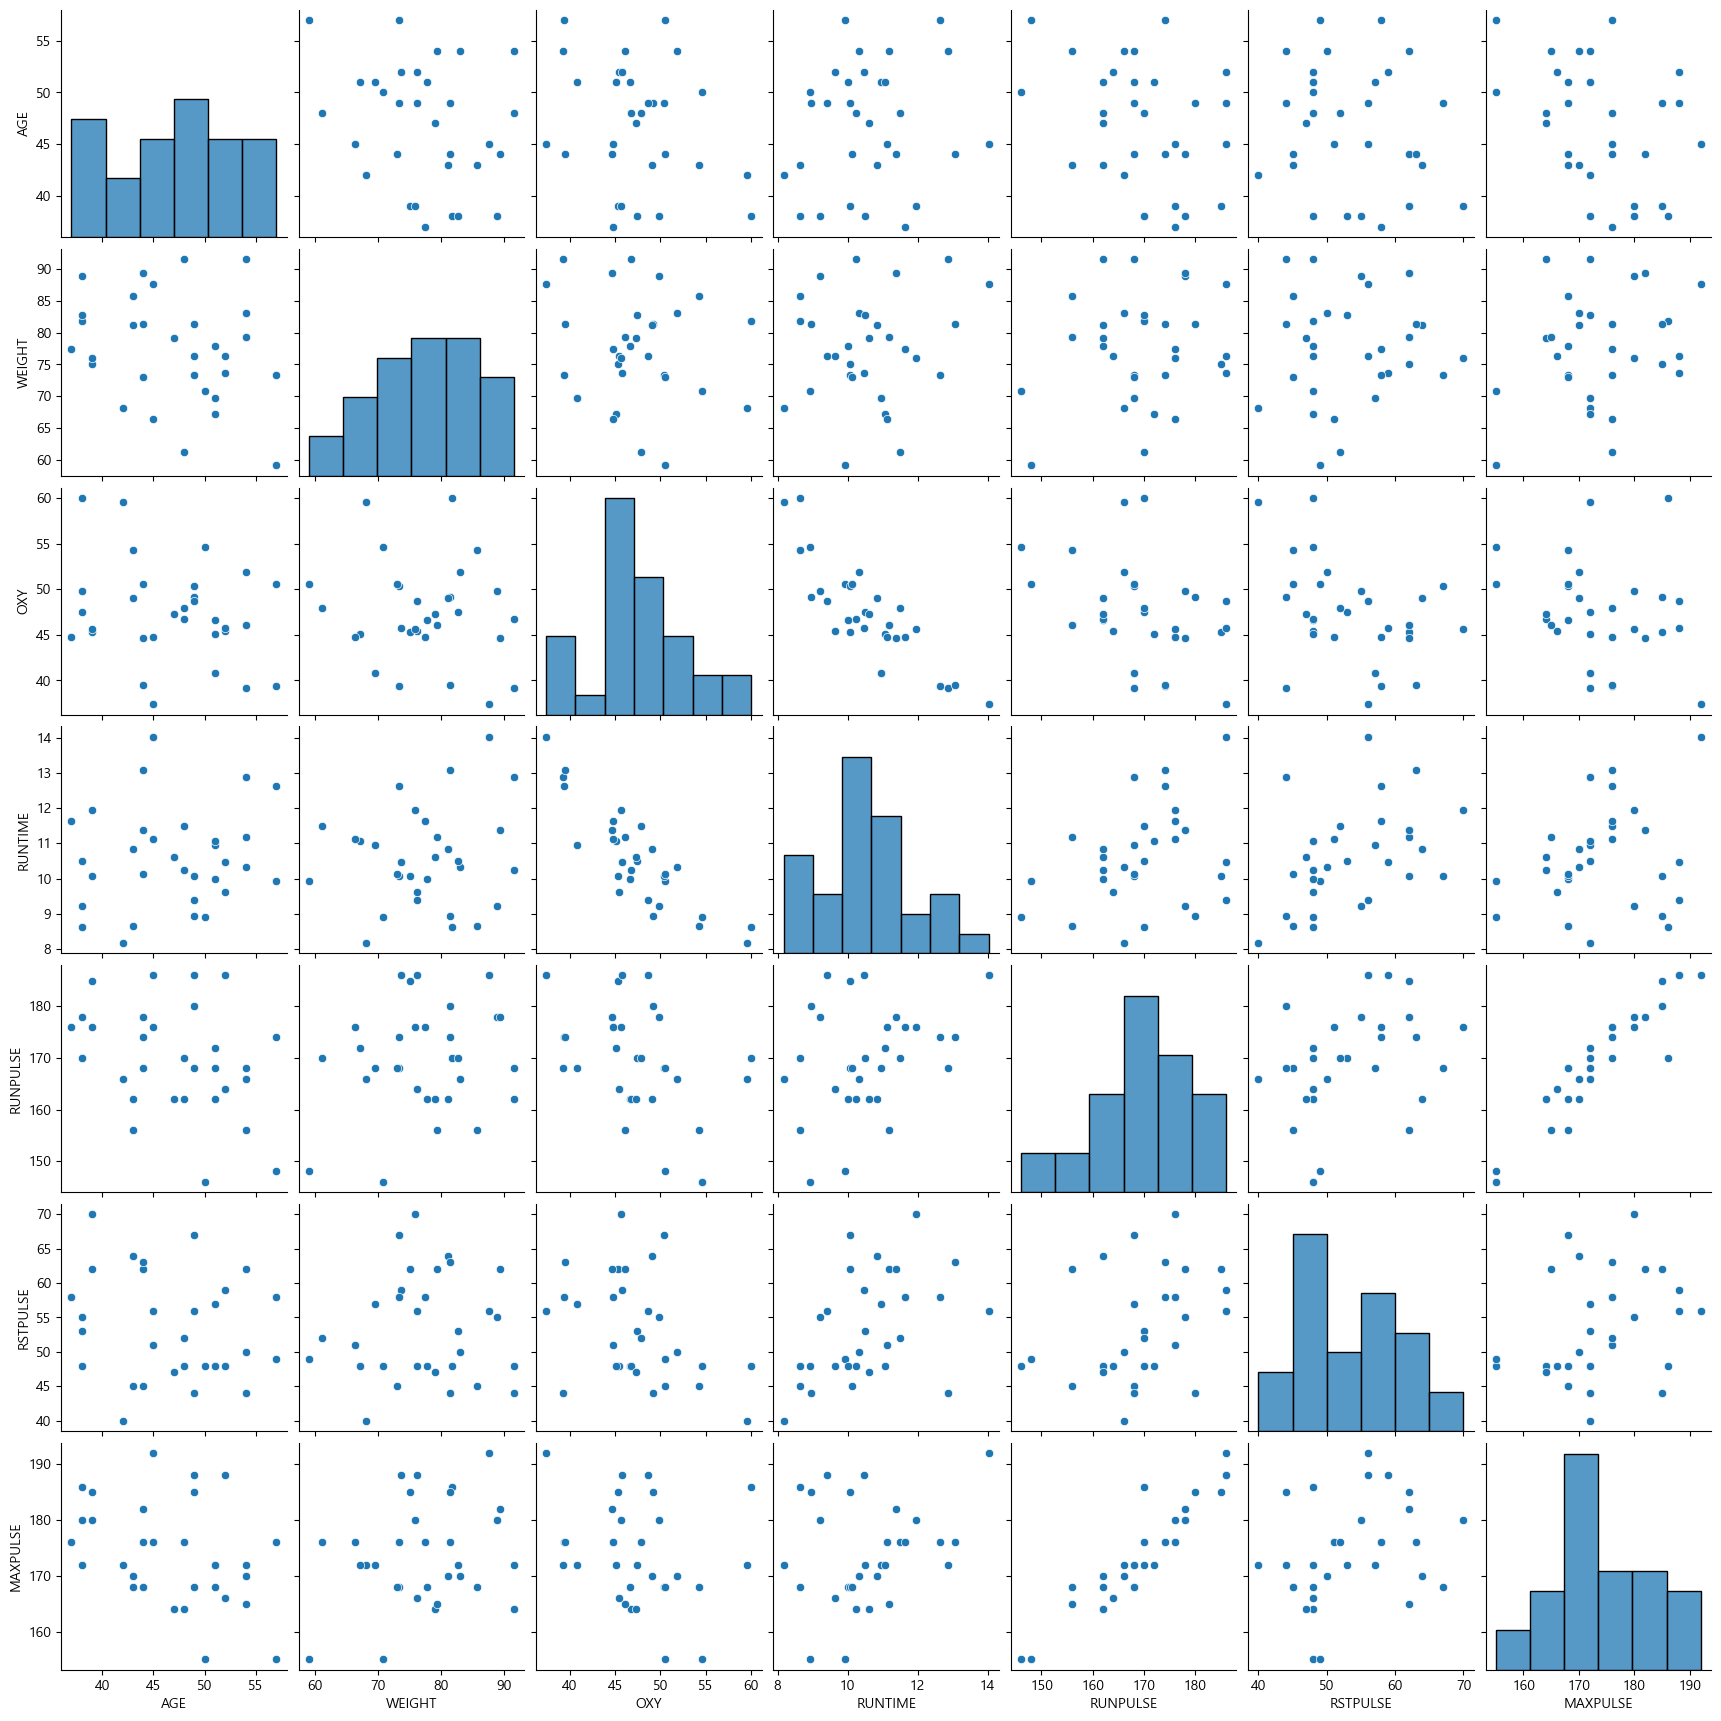

In [79]:
sns.pairplot(df_fitness)

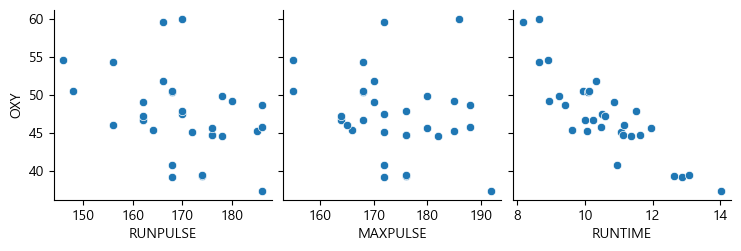

In [80]:
sns.pairplot(df_fitness, y_vars = ['OXY'], x_vars = ['RUNPULSE', 'MAXPULSE', 'RUNTIME'])

In [83]:
df_agg = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index = False).agg('mean')
df_pivot = df_agg.pivot('GENDER', 'AGEGROUP', 'OXY')
sns.heatmap(df_pivot, cmap = 'Blues')

TypeError: agg function failed [how->mean,dtype->object]

<Axes: >

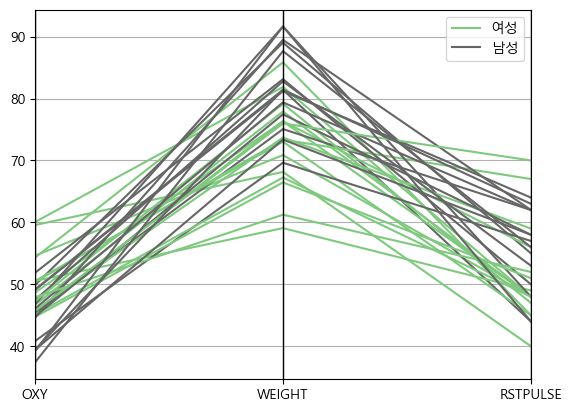

In [ ]:
pd.plotting.parallel_coordinates(df_fitness, 'GENDER', cols = ['OXY', 'WEIGHT', 'RSTPULSE'], colormap = 'Accent')